# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download. Here we show the pipeline for Convallaria dataset. Save the dataset in an appropriate path. For us, the path is the data folder which exists at `../../../`. For Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

zipPath="../../../data/Convallaria_diaphragm.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve('https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Convallaria_diaphragm/'
fileName='20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif'
dataName='convallaria' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Convallaria` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch = 10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.2344296507537365+-(2SEM)0.08098931163025297      
Epoch 1 finished      
avg. loss: 0.17566785998642445+-(2SEM)0.05090246517761657      
Epoch 2 finished      
avg. loss: 0.14994437247514725+-(2SEM)0.040595121893493645      
Epoch 3 finished      
avg. loss: 0.14394769687205552+-(2SEM)0.0530738220484092      
Epoch 4 finished      
avg. loss: 0.1384097808972001+-(2SEM)0.03420483910778239      
Epoch 5 finished      
avg. loss: 0.12095723822712898+-(2SEM)0.026184851038558343      
Epoch 6 finished      
avg. loss: 0.13290307372808458+-(2SEM)0.03156991027380271      
Epoch 7 finished      
avg. loss: 0.14870907571166753+-(2SEM)0.042759482103189944      
Epoch 8 finished      
avg. loss: 0.08594963066279888+-(2SEM)0.02452120862461646      
Epoch 9 finished      
avg. loss: 0.13077778741717339+-(2SEM)0.035298724368798814      
Epoch 10 finished      
avg. loss: 0.11709491554647684+-(2SEM)0.02812997906892864      
Epoch 11 finished      
avg. loss: 0.1104

Epoch 89 finished      
avg. loss: 0.09186073392629623+-(2SEM)0.016852916045414806      
Epoch 90 finished      
avg. loss: 0.118930144328624+-(2SEM)0.029088788167512106      
Epoch 91 finished      
avg. loss: 0.10705497730523347+-(2SEM)0.02668071589587207      
Epoch 92 finished      
avg. loss: 0.11620415728539228+-(2SEM)0.023590692720729674      
Epoch 93 finished      
avg. loss: 0.13239898039028047+-(2SEM)0.03986383696609629      
Epoch 94 finished      
avg. loss: 0.10669948626309633+-(2SEM)0.01851345371134069      
Epoch    94: reducing learning rate of group 0 to 7.8125e-06.
Epoch 95 finished      
avg. loss: 0.12859303634613753+-(2SEM)0.04198988515837183      
Epoch 96 finished      
avg. loss: 0.10322072375565768+-(2SEM)0.027304665151385264      
Epoch 97 finished      
avg. loss: 0.10977734141051769+-(2SEM)0.02899902739025659      
Epoch 98 finished      
avg. loss: 0.1042820698581636+-(2SEM)0.027063038908508277      
Epoch 99 finished      
avg. loss: 0.11063576024025679+-

avg. loss: 0.12193800061941147+-(2SEM)0.04350002447762752      
Epoch 176 finished      
avg. loss: 0.10929095121100545+-(2SEM)0.03358076578813249      
Epoch 177 finished      
avg. loss: 0.09925968637689948+-(2SEM)0.03078996831795531      
Epoch 178 finished      
avg. loss: 0.12128206193447114+-(2SEM)0.021933047781145278      
Epoch 179 finished      
avg. loss: 0.1153112642467022+-(2SEM)0.033547747724892364      
Epoch 180 finished      
avg. loss: 0.11225907988846302+-(2SEM)0.03344113295723936      
Epoch 181 finished      
avg. loss: 0.10513929445296526+-(2SEM)0.03442688141712239      
Epoch 182 finished      
avg. loss: 0.14900882821530104+-(2SEM)0.047902721970165      
Epoch   182: reducing learning rate of group 0 to 3.0518e-08.
Epoch 183 finished      
avg. loss: 0.10140182711184025+-(2SEM)0.02849824701147344      
Epoch 184 finished      
avg. loss: 0.11984668336808682+-(2SEM)0.022796308765097372      
Epoch 185 finished      
avg. loss: 0.0931733543984592+-(2SEM)0.029829477

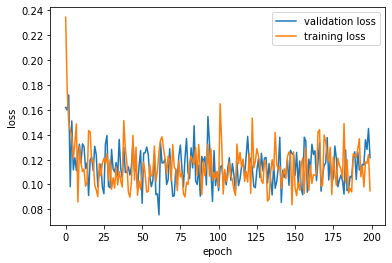

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()